**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from pandas import DataFrame 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
data = pd.read_csv("2Classdata.csv")
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [6]:
print(data.shape)
#data set contain 310 rows and 7 coulmns.

(310, 7)


In [7]:
#5 point summary of data 
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
#checking for null values 
print(data.isnull().any())
#As all the column values is False hence we can conclude that there is no null value in the data set.

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool


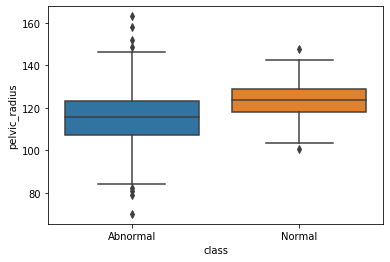

In [9]:
#Distribution of pelvic_radius on different class.
sns.boxplot(x='class',y='pelvic_radius',data=data)

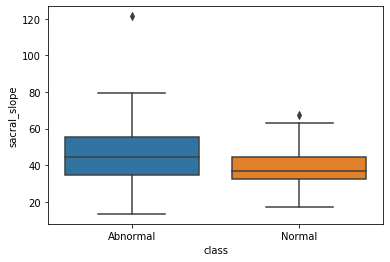

In [10]:
#distribution of sacral_slope on different class.
sns.boxplot(x='class',y='sacral_slope',data=data)

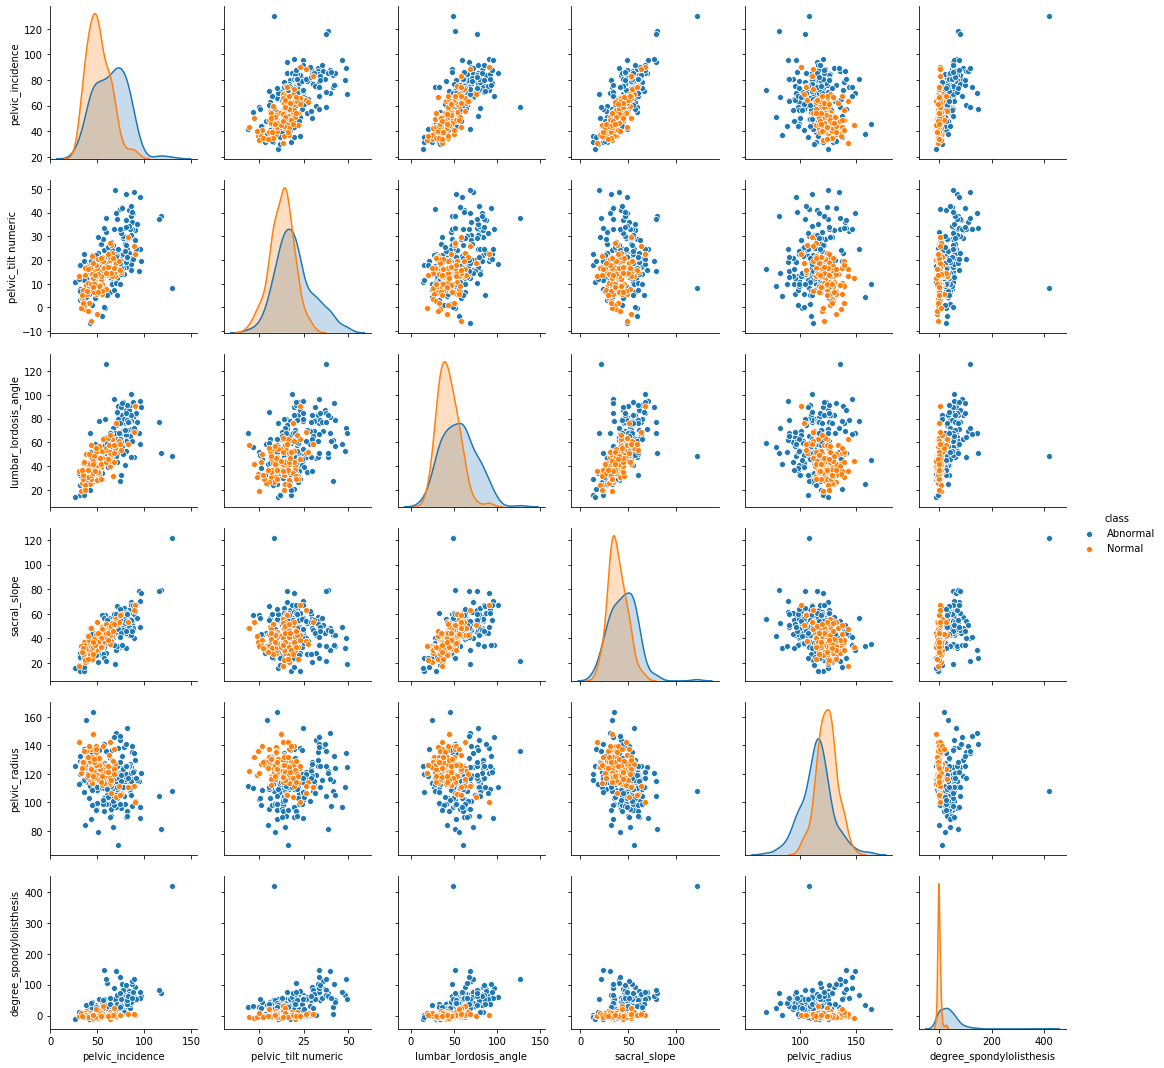

In [11]:
sns.pairplot(data=data, hue = 'class',diag_kind = 'kde')

# Encode the Class variable to integer.

In [12]:
data_en= data
data_en

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [13]:
#encoded Abnormal as 1 and Normal as 0 , because machine learning alogorithms only understand numbers. 
data_en["class"]= data_en['class'].replace('Abnormal',1)
data_en['class'] = data_en['class'].replace('Normal',0)
data_en

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


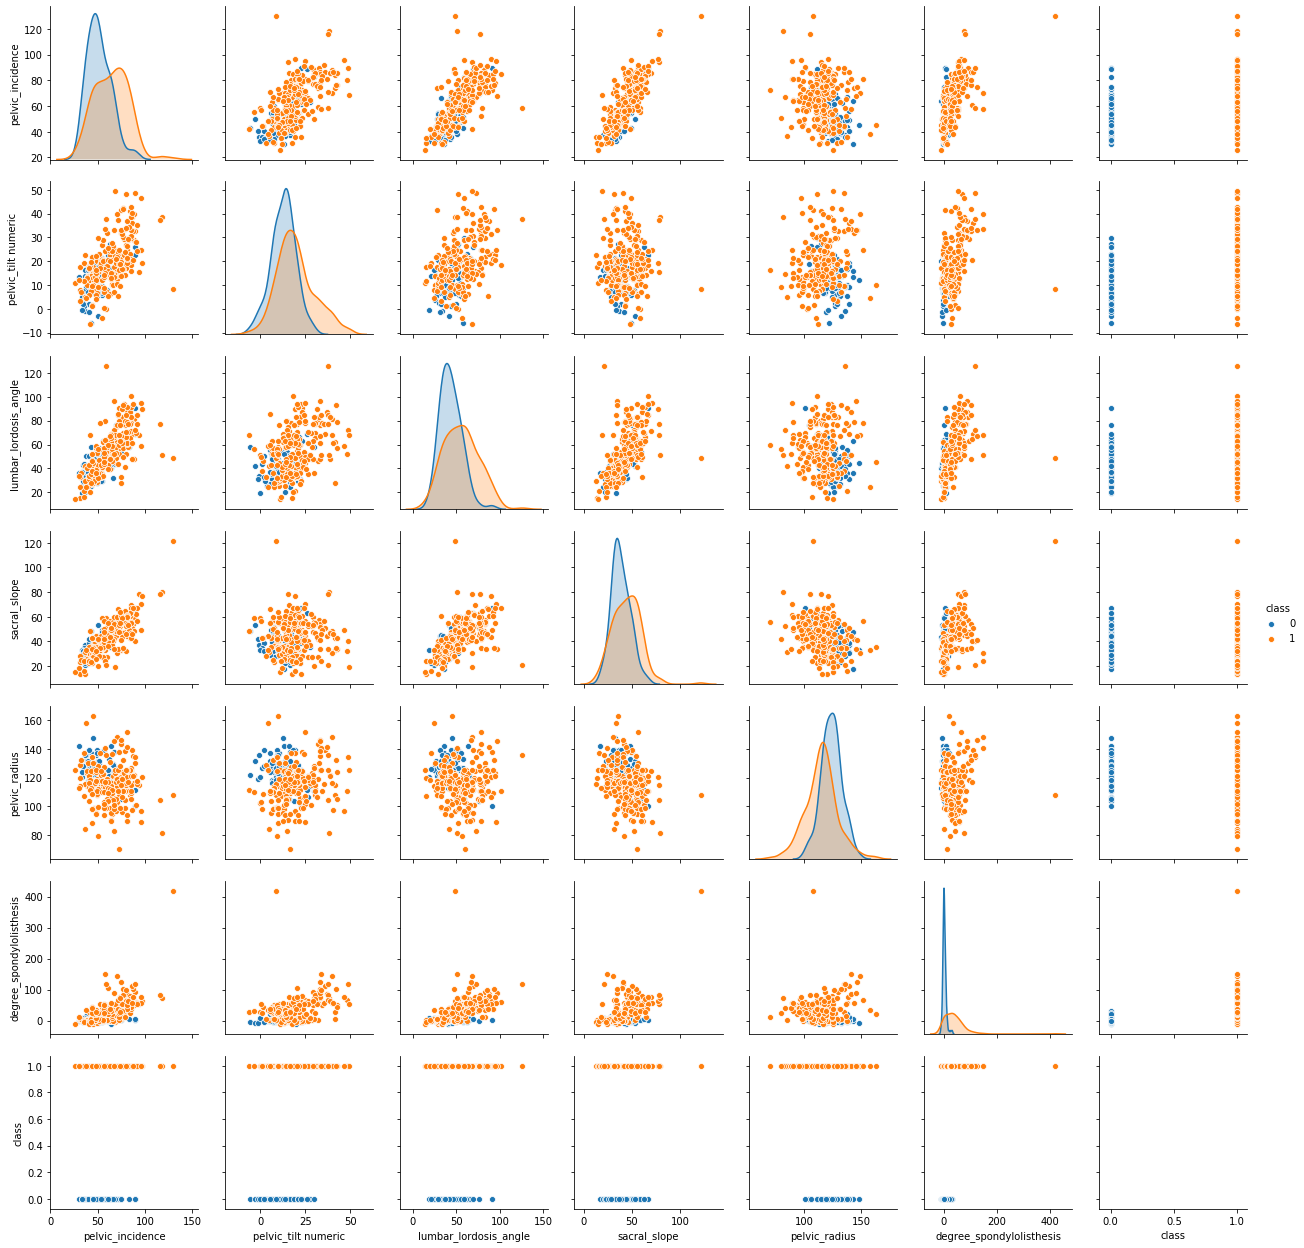

In [14]:
sns.pairplot(data=data_en, hue='class',diag_kind='kde')

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [15]:
#(Target-set) 
y = data_en.pop("class")

In [16]:
#Feature Set
X = data_en
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


# Normalize your Data (X) to get values between 0 to 1.

In [17]:
#(Feature-set)
data_zscore = X.apply(zscore)
data_zscore

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


# Split the dat as train and test with a ratio of 70:30.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split(data_zscore,y,test_size = 0.30,random_state=5)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [55]:
NNH = KNeighborsClassifier(n_neighbors = 3)
NNH.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [56]:
NNH.score(X_test,Y_test) #performance on test data.

0.8279569892473119

In [57]:
predicted_labels = NNH.predict(X_test)
print(metrics.confusion_matrix(Y_test,predicted_labels))

[[26  7]
 [ 9 51]]


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
mylist = list(range(1,50))


cv_scores = []
k_neighbors = []

for k in mylist:
    KNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(KNN, X_train , Y_train ,cv=10,scoring = 'accuracy' )
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = mylist[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 10


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [59]:
data_3c = pd.read_csv("3Classdata.csv")

In [60]:
data_3c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [61]:
data_3c.head()
#Checking head of data set .

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [62]:
data_3c.tail()
#checking tail of dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [63]:
print(data_3c.shape)
#Data set has 310 rows and 7 columns.

(310, 7)


In [64]:
print(data_3c.info())
#shows overall information of datatypes ,number of rows and columns.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [65]:
#5 point summary of data
data_3c.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [66]:
#missing value checking
print(data_3c.isnull().any())
#As all the columns showing false hence we can conclude that no missing value is present.

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool


In [67]:
data_3c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


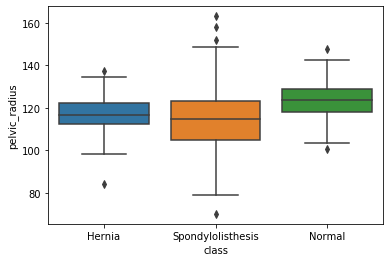

In [68]:
#Distribution of pelvic_radius on different classes.
sns.boxplot(x='class',y='pelvic_radius',data=data_3c)

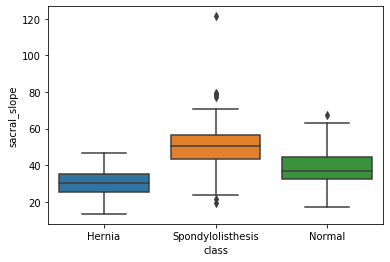

In [69]:
#Distribution of sacral_slope on different classes.
sns.boxplot(x='class', y='sacral_slope', data=data_3c)

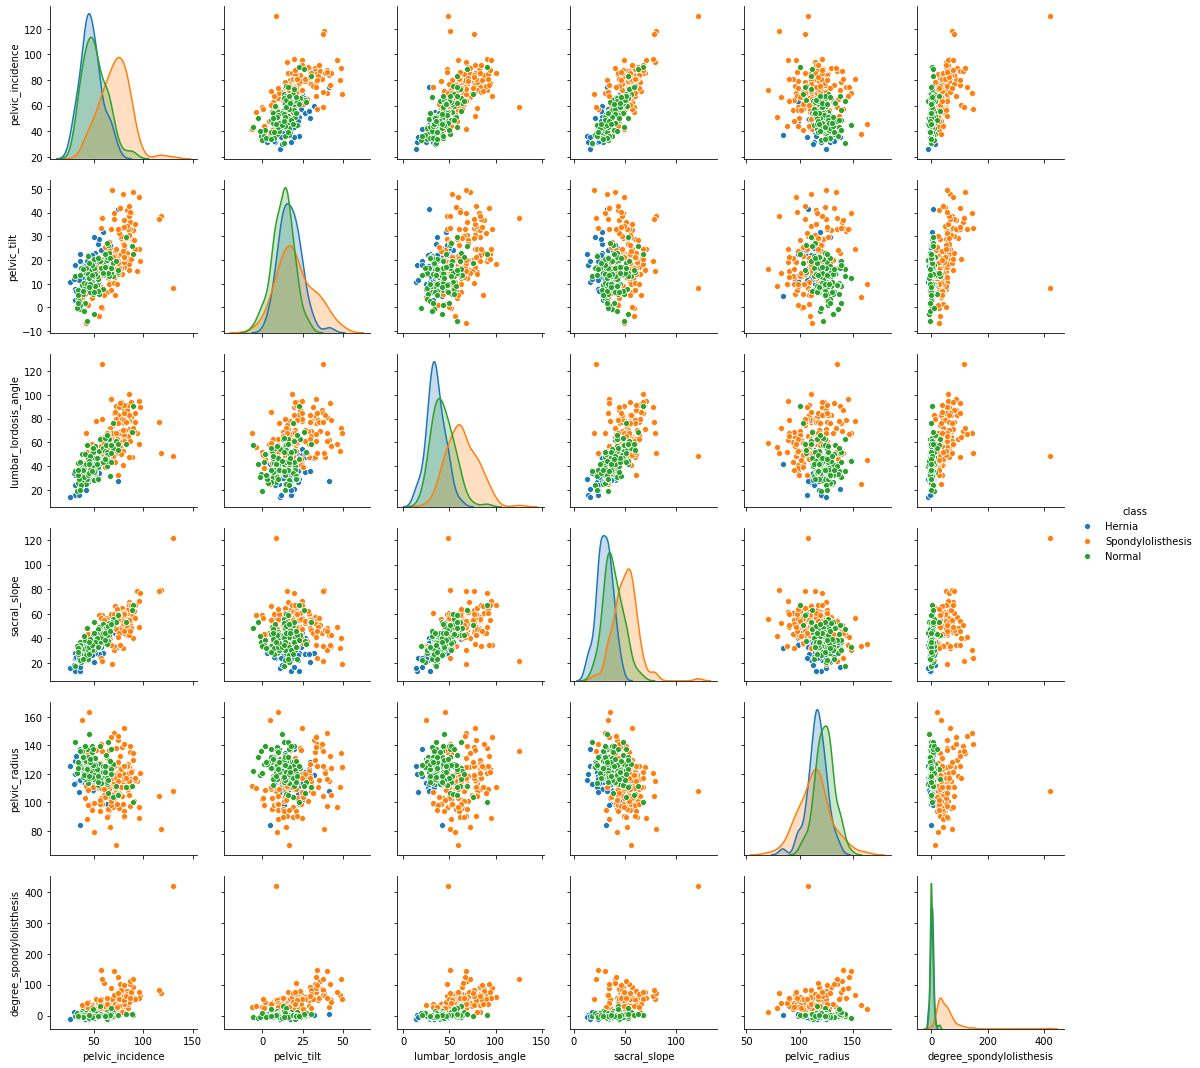

In [70]:
sns.pairplot(data=data_3c,hue ='class',diag_kind = 'kde' )

In [71]:
#As ML alogorithms only understand numerical values hence replacing Hernia with 1, Spondylolisthesis with 2 
#and Normal with 0.

data_3c_en=data_3c
data_3c_en = data_3c_en.replace('Hernia',1)
data_3c_en=data_3c_en.replace('Spondylolisthesis',2)
data_3c_en=data_3c_en.replace('Normal',0)
data_3c_en['class'].unique()

array([1, 2, 0], dtype=int64)

C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


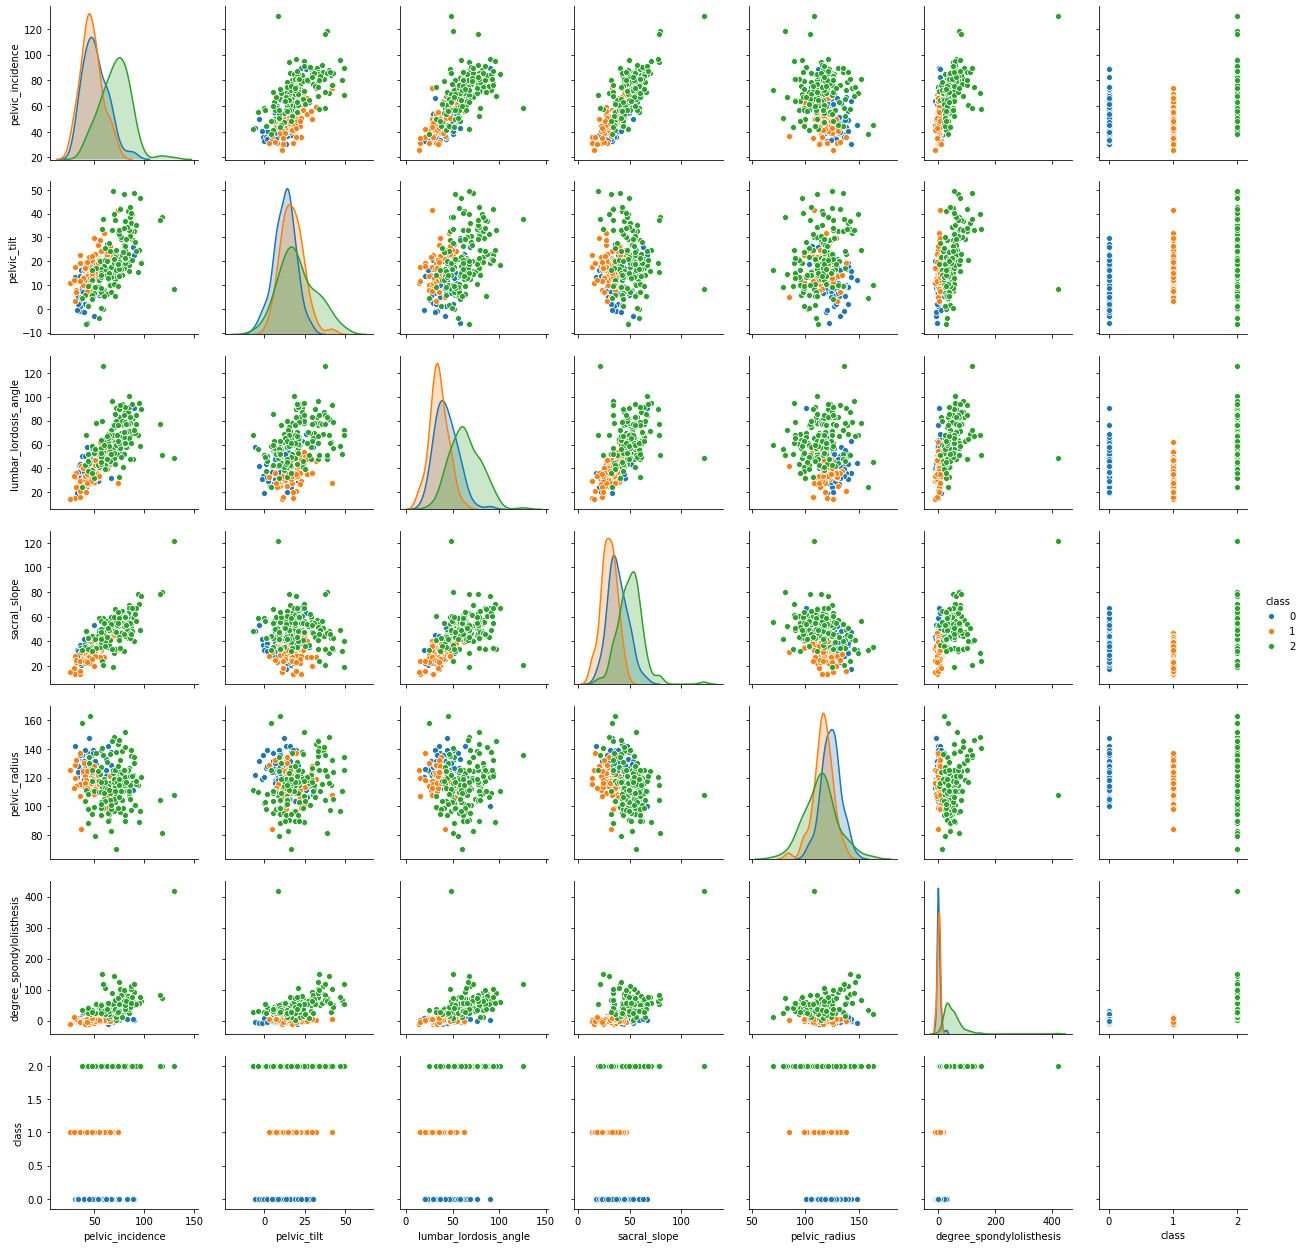

In [72]:
sns.pairplot(data=data_3c_en , hue = 'class' , diag_kind = 'kde')

In [73]:
#Target set
Y_3c = data_3c_en.pop("class")

In [74]:
#Feature set
X_3c = data_3c_en
X_3c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [75]:
data_3c_zscore = X_3c.apply(zscore)
data_3c_zscore

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


In [118]:
#splitting data into 70:30 
from sklearn.model_selection import train_test_split
X_train_3c,X_test_3c,y_train_3c,y_test_3c = train_test_split(data_3c_zscore,Y_3c,test_size = 0.3,random_state =2)

In [119]:
#Intantiating and fitting the model
NH=KNeighborsClassifier(n_neighbors=3)
NH.fit(X_train_3c,y_train_3c)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [120]:
#Checking score 
NH.score(X_test_3c,y_test_3c)

0.7849462365591398

In [121]:
#Creation of confusion matrix
predicted_label_2 = NH.predict(X_test)
print(metrics.confusion_matrix(y_test_3c,predicted_label_2))

[[14  4  7]
 [ 6  3  8]
 [17 10 24]]


In [123]:
#Cross validation on the data.


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

c_v_score = []
k_neigh= []

mylist1 = list(range(1,100))

for i in mylist1:
    knn = KNeighborsClassifier(n_neighbors = i)
    c_vscore = cross_val_score(knn,X_train_3c,y_train_3c,cv=10,scoring = 'accuracy')
    c_v_score.append(c_vscore.mean())
    k_neigh.append(i)
    
MSE1 = [1 - x for x in c_v_score]
min(MSE1)
MSE1.index(min(MSE1))
best_k1 = mylist1[MSE1.index(min(MSE1))]
print ("The optimal number of neighbors is %d" % best_k1)

The optimal number of neighbors is 17
